In [25]:
%pylab inline

import pickle

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Built through a combination of BoxOfficeMojo and The Numbers

In [8]:
f = open('allofit.pkl', 'rb')
allofit = pickle.load(f)
f.close()

This is:
* Name
* Budget (if available)
* DataFrame of BoxOffice Info

In [10]:
for val in allofit[0]:
    print(type(val))

<class 'str'>
<class 'float'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
print(allofit[90])

('The Rite', 37000000.0,       Rank  WeeklyGross  PctChangeWkGross  Theaters  DeltaTheaters  AvgRev  \
Week                                                                         
1        1     18112223               NaN      2985            NaN    6068   
2        7      7493714             -58.6      2985            NaN    2510   
3       12      4656448             -37.9      2207         -778.0    2110   
4       16      1568793             -66.3      1048        -1159.0    1497   
5       21       633369             -59.6       545         -503.0    1162   
6       32       207759             -67.2       201         -344.0    1034   
7       46        76157             -63.3        85         -116.0     896   
8       35       158708             108.0       202          117.0     786   
9       42       104842             -33.9       155          -47.0     676   
10      56        35620             -66.0        72          -83.0     495   

      GrossToDate  Week   Thursday  
W

In [32]:
test = allofit[2][2]
test

,Rank,WeeklyGross,PctChangeWkGross,Theaters,DeltaTheaters,AvgRev,GrossToDate,Week,Thursday
Week,,,,,,,,,
1,2,15672286,NaN,2931,NaN,5347,15672286,1,2017-02-12
2,8,7750932,-50.5,2931,NaN,2644,23423218,2,2017-02-19
3,12,3186256,-58.9,1560,-1371.0,2042,26609474,3,2017-02-26
4,19,865824,-72.8,719,-841.0,1204,27475298,4,2017-03-05
5,34,168931,-80.5,174,-545.0,971,27644229,5,2017-03-12
6,47,60459,-64.2,76,-98.0,796,27704688,6,2017-03-19
7,36,88330,46.1,116,40.0,761,27793018,7,2017-03-26


In [33]:
pd.DatetimeIndex(test['Thursday']).week

Int64Index([6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Thursday')

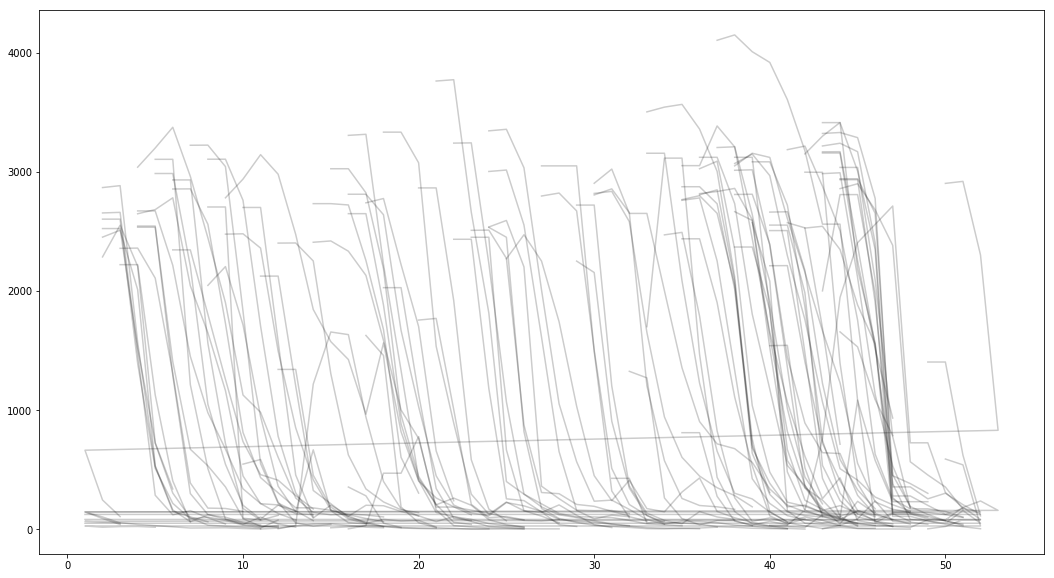

In [34]:
fig, ax = plt.subplots(figsize=(18, 10))

for movie in allofit:
    ax.plot(pd.DatetimeIndex(movie[2]['Thursday']).week, movie[2]['Theaters'], color='k', alpha=.2)

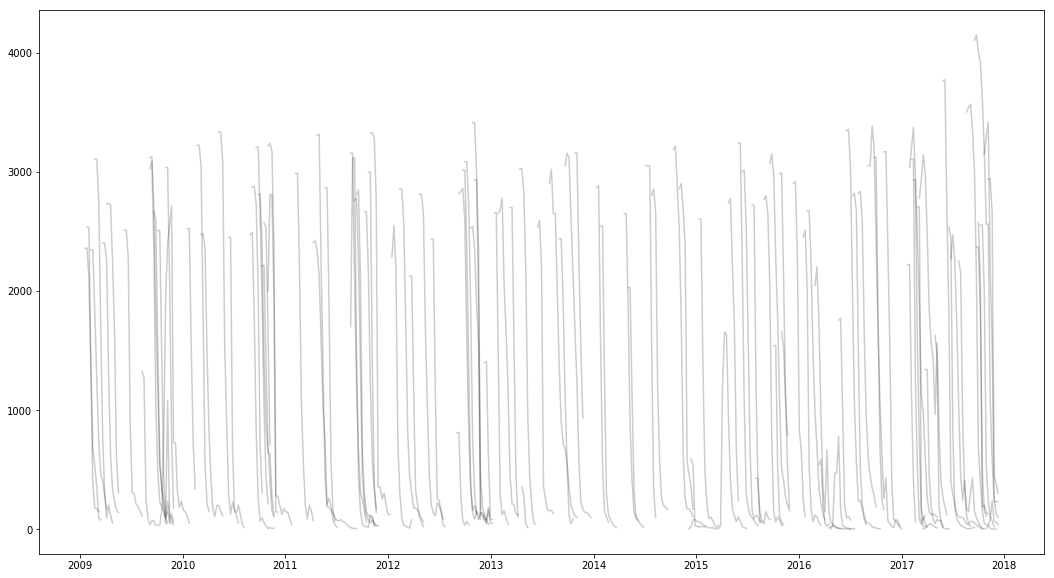

In [35]:
fig, ax = plt.subplots(figsize=(18, 10))

for movie in allofit:
    ax.plot(movie[2]['Thursday'], movie[2]['Theaters'], color='k', alpha=.2)

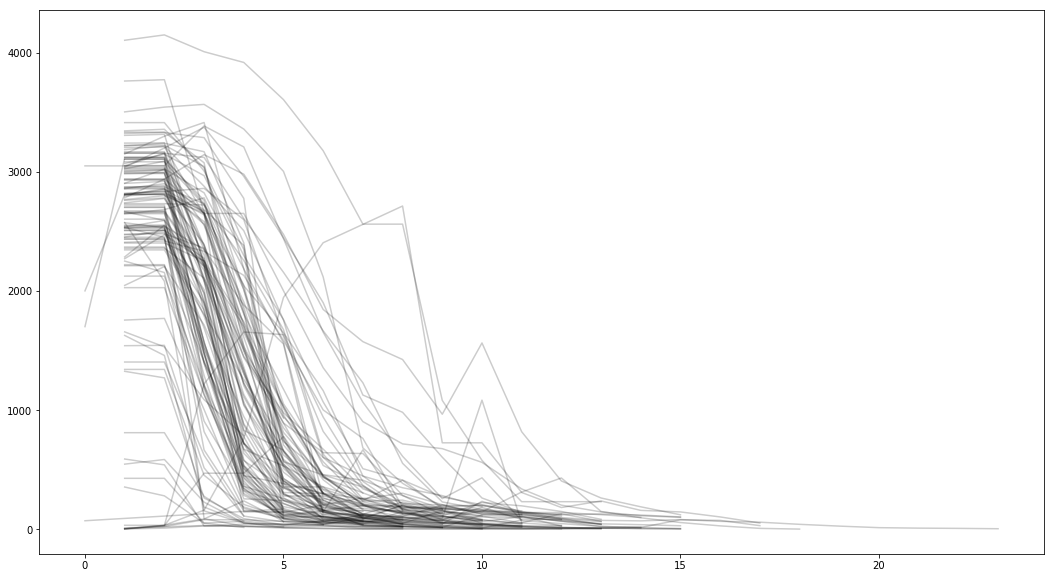

In [36]:
fig, ax = plt.subplots(figsize=(18, 10))

for movie in allofit:
    ax.plot(movie[2]['Week'], movie[2]['Theaters'], color='k', alpha=.2)